In [ ]:
!pip install -r requirements.txt

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [ ]:
# Input data - travel log
data = [
    ("2024-05-18", "2024-06-04"),
    ("2024-07-20", "2024-09-18"),
    ("2024-11-26", "2024-12-03"),
    ("2024-12-22", "2025-01-06"),
    ("2025-01-26", "2025-02-01"),
    ("2025-04-06", "2025-04-19"),
    ("2025-06-09", "2025-06-24"),
    ("2025-07-26", "2025-08-09"),
    ("2025-08-14", "2025-08-23"),
    ("2025-09-14", "2025-09-28"),
    ("2025-10-06", "2025-10-12")
]


📊 Abroad Stats:
  Total periods abroad: 11
  Total days abroad: 187
  Average trip length: 17.00 days
  Max single trip abroad: 61 days

✅ All 365-day periods pass both checks.


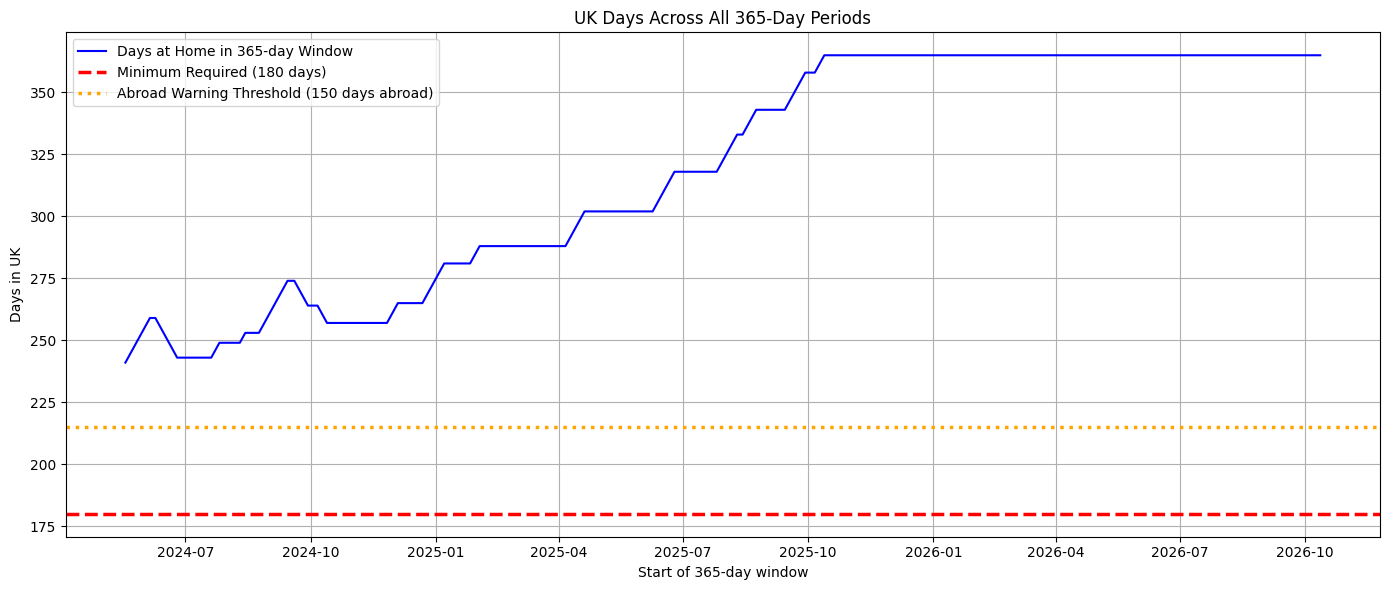

In [15]:
# Convert to date ranges
abroad_ranges = []
abroad_lengths = []

for start, end in data:
    date_range = pd.date_range(start=start, end=end)
    abroad_ranges.append(date_range)
    abroad_lengths.append(len(date_range))

# Flatten all abroad dates
abroad_days = set()
for r in abroad_ranges:
    abroad_days.update(r)

# Stats
total_abroad_days = len(abroad_days)
max_abroad_period = max(abroad_lengths)
avg_abroad_period = sum(abroad_lengths) / len(abroad_lengths)
total_periods = len(data)

# Range to evaluate
start_date = min(min(r) for r in abroad_ranges)
end_date = max(max(r) for r in abroad_ranges) + timedelta(days=365)

# Daily evaluation
violations = []
warnings = []
all_dates = pd.date_range(start=start_date, end=end_date)

home_abroad_list = []  # For plotting

for day in all_dates:
    window = pd.date_range(start=day, end=day + timedelta(days=364))
    abroad_in_window = sum(1 for d in window if d in abroad_days)
    home_days = 365 - abroad_in_window
    home_abroad_list.append((day, home_days))

    if home_days < 180:
        violations.append((day.strftime('%Y-%m-%d'), home_days, abroad_in_window))
    elif abroad_in_window >= 150:
        warnings.append((day.strftime('%Y-%m-%d'), home_days, abroad_in_window))

# Output stats
print("\n📊 Abroad Stats:")
print(f"  Total periods abroad: {total_periods}")
print(f"  Total days abroad: {total_abroad_days}")
print(f"  Average trip length: {avg_abroad_period:.2f} days")
print(f"  Max single trip abroad: {max_abroad_period} days")

# Rule checks
if violations:
    print("\n❌ Rule violations (less than 180 days at home):")
    for date, home_days, abroad_days in violations:
        print(f"  Window starting {date}: {home_days} home, {abroad_days} abroad")

if warnings:
    print("\n⚠️ Warnings (150+ days abroad):")
    for date, home_days, abroad_days in warnings:
        print(f"  Window starting {date}: {home_days} home, {abroad_days} abroad")

if not violations and not warnings:
    print("\n✅ All 365-day periods pass both checks.")

# Plotting
dates = [x[0] for x in home_abroad_list]
home_days_counts = [x[1] for x in home_abroad_list]

plt.figure(figsize=(14, 6))
plt.plot(dates, home_days_counts, label='Days at Home in 365-day Window', color='blue')
plt.axhline(180, color='red', linestyle='--', linewidth=2.5, label='Minimum Required (180 days)')
plt.axhline(215, color='orange', linestyle=':', linewidth=2.5, label='Abroad Warning Threshold (150 days abroad)')
plt.title('UK Days Across All 365-Day Periods')
plt.xlabel('Start of 365-day window')
plt.ylabel('Days in UK')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()